# **Week 1: Data Preparation and Feature Engineering**

In [248]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, silhouette_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [249]:
file_path = "/content/social_media_sentiment_analysis_final.csv"
df = pd.read_csv(file_path)

In [250]:
# Display basic information
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Post             500 non-null    object 
 1   Sentiment        500 non-null    object 
 2   Likes            500 non-null    int64  
 3   Shares           500 non-null    int64  
 4   Comments         500 non-null    int64  
 5   Platform         500 non-null    object 
 6   Date             500 non-null    object 
 7   Hashtags         500 non-null    object 
 8   User Type        500 non-null    object 
 9   User Followers   500 non-null    int64  
 10  Post Type        500 non-null    object 
 11  Sentiment Score  500 non-null    float64
 12  Country          500 non-null    object 
 13  Post Length      500 non-null    int64  
 14  Engagement Rate  500 non-null    float64
 15  Time of Day      500 non-null    object 
 16  Topic            500 non-null    object 
dty

In [251]:
# Display first few rows
print("\nFirst five rows of the dataset:")
print(df.head())


First five rows of the dataset:
                                                Post Sentiment  Likes  Shares  \
0  Fantastic service, will definitely use again! ...   Neutral   2371     682   
1  Best customer support ever! They solved my iss...   Neutral   3774     966   
2     Worst experience ever, not recommended. #angry   Neutral   2487     418   
3   Had an average experience, nothing special. #meh   Neutral   4803     128   
4  This service is terrible, never using it again...  Negative   2197     563   

   Comments   Platform        Date       Hashtags   User Type  User Followers  \
0       162  Instagram  2024-08-23     #satisfied  Influencer          478792   
1        52   LinkedIn  2024-09-14      #grateful  Influencer          166753   
2        84    Twitter  2024-04-28         #angry       Brand          481643   
3       258    Twitter  2024-12-21           #meh       Brand          981282   
4       411    Twitter  2024-08-17  #disappointed       Brand          8411

In [252]:
# Display initial dataset structure
print("Initial Dataset Shape:", df.shape)
print("Columns:", df.columns)

Initial Dataset Shape: (500, 17)
Columns: Index(['Post', 'Sentiment', 'Likes', 'Shares', 'Comments', 'Platform', 'Date',
       'Hashtags', 'User Type', 'User Followers', 'Post Type',
       'Sentiment Score', 'Country', 'Post Length', 'Engagement Rate',
       'Time of Day', 'Topic'],
      dtype='object')


In [253]:

# ===== 1. Handle missing values =====
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Post               0
Sentiment          0
Likes              0
Shares             0
Comments           0
Platform           0
Date               0
Hashtags           0
User Type          0
User Followers     0
Post Type          0
Sentiment Score    0
Country            0
Post Length        0
Engagement Rate    0
Time of Day        0
Topic              0
dtype: int64


In [254]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))



Summary Statistics:
                                                     Post Sentiment  \
count                                                 500       500   
unique                                                 10         3   
top     I guess this is fine, not great, not bad. #neu...   Neutral   
freq                                                   61       298   
mean                                                  NaN       NaN   
std                                                   NaN       NaN   
min                                                   NaN       NaN   
25%                                                   NaN       NaN   
50%                                                   NaN       NaN   
75%                                                   NaN       NaN   
max                                                   NaN       NaN   

             Likes      Shares    Comments Platform        Date  Hashtags  \
count    500.00000  500.000000  500.000000      5

In [255]:
# Identify categorical and numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

print("\nNumerical Features:", numerical_features.tolist())
print("Categorical Features:", categorical_features.tolist())



Numerical Features: ['Likes', 'Shares', 'Comments', 'User Followers', 'Sentiment Score', 'Post Length', 'Engagement Rate']
Categorical Features: ['Post', 'Sentiment', 'Platform', 'Date', 'Hashtags', 'User Type', 'Post Type', 'Country', 'Time of Day', 'Topic']


In [256]:
# === 2. Encoding Categorical Variables ===
# Encode target variable: Sentiment
label_encoder = LabelEncoder()
df['Sentiment_Label'] = label_encoder.fit_transform(df['Sentiment'])

In [257]:
# ===== 3. One-hot encode categorical columns =====
categorical_cols = ['Platform', 'User Type', 'Post Type', 'Country', 'Time of Day', 'Topic']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [258]:
# === 3. Scaling Numerical Features ===
scaler = StandardScaler()
numeric_columns = ['Likes', 'Shares', 'Comments', 'User Followers',
                   'Post Length', 'Engagement Rate', 'Sentiment Score']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

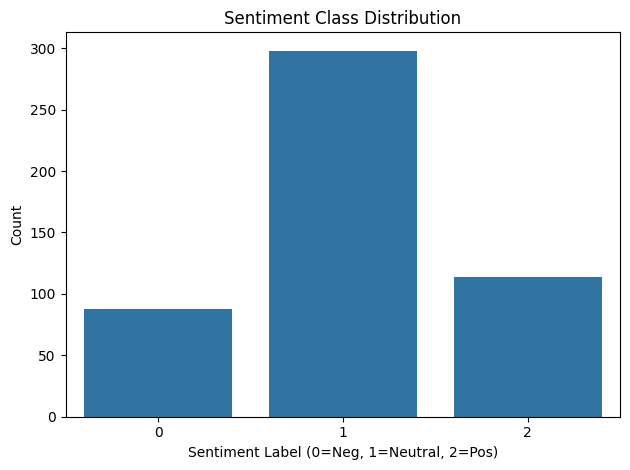

In [259]:
# === 4. Analyze Class Imbalance ===
sns.countplot(data=df, x='Sentiment_Label')
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment Label (0=Neg, 1=Neutral, 2=Pos)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

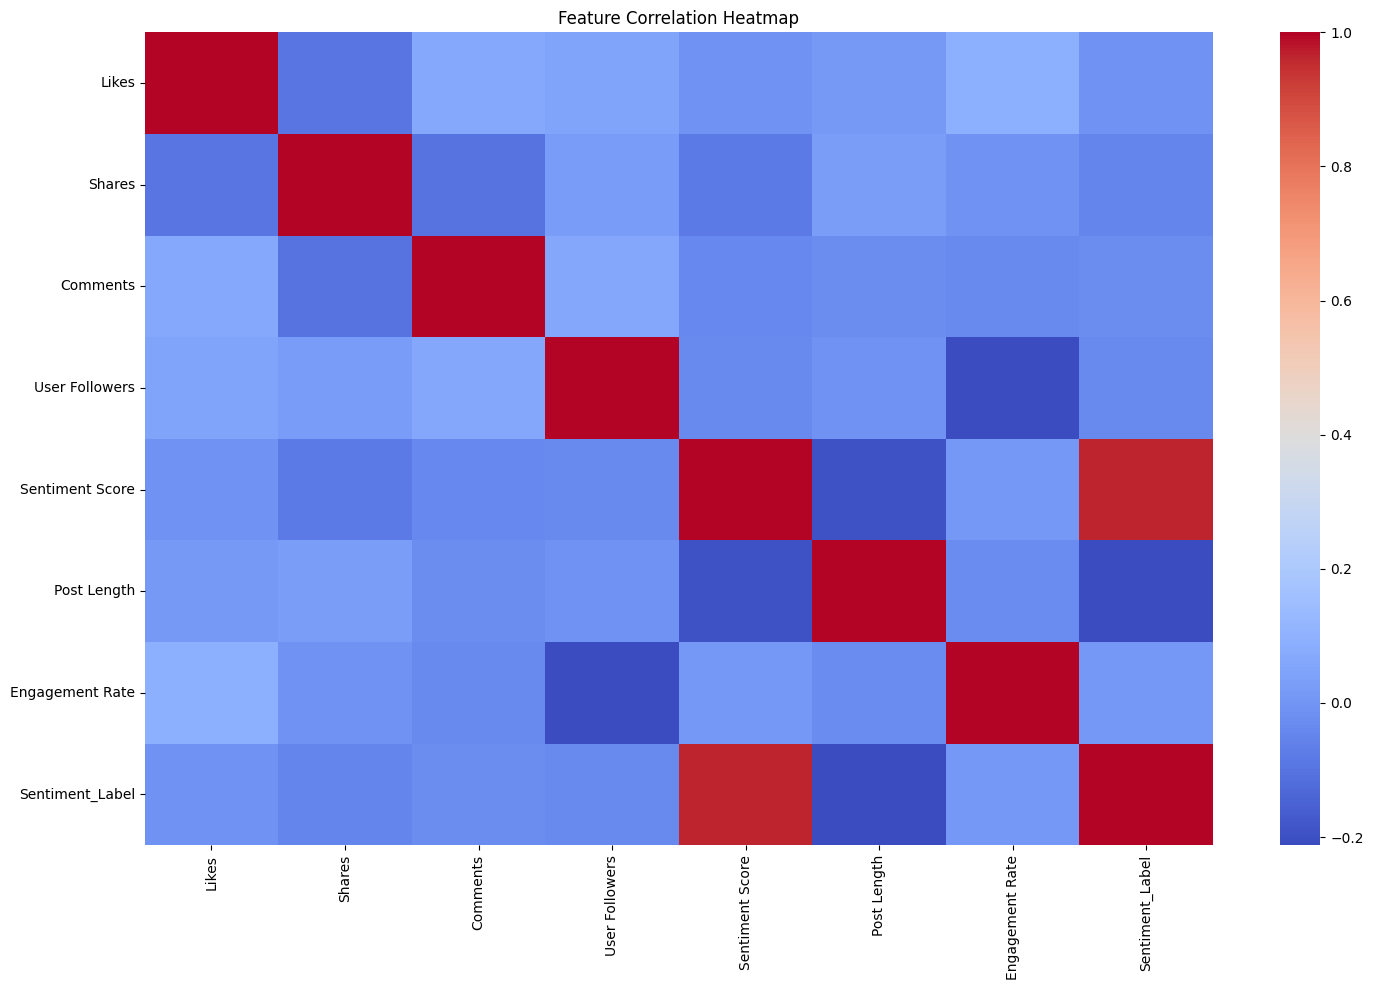

In [260]:
# Only select numeric columns before correlation
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [261]:
# === 5. Save preprocessed dataset ===
df.to_csv("preprocessed_sentiment_dataset.csv", index=False)
print(" Preprocessed dataset saved as 'preprocessed_sentiment_dataset.csv'")

 Preprocessed dataset saved as 'preprocessed_sentiment_dataset.csv'


# **Week 2: Model Development and Experimentation**

In [262]:
# === 1. Prepare Features and Target ===
X = df.drop(columns=["Sentiment_Label"])
y = df["Sentiment_Label"]

In [263]:
X = df.select_dtypes(include=["number"]).drop(columns=["Sentiment_Label"])
y = df["Sentiment_Label"]


In [264]:
# === 2. Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [265]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Train basic Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
rf_preds = rf.predict(X_test)
print("Random Forest - Basic Model Classification Report:\n")
print(classification_report(y_test, rf_preds))

Random Forest - Basic Model Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        21

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [266]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=42)
cv_scores_rf = cross_val_score(rf, X, y, cv=5)
print("Random Forest CV Accuracy:", cv_scores_rf.mean())


Random Forest CV Accuracy: 1.0


In [267]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Set up GridSearchCV
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit the model on training data
grid.fit(X_train, y_train)

# Best model
rf_best = grid.best_estimator_

# Predict using best model
rf_preds = rf_best.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report
print("Best Parameters:", grid.best_params_)
print("\nClassification Report:\n")
print(classification_report(y_test, rf_preds))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        21

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [268]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train basic SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Predict and evaluate
svm_preds = svm.predict(X_test)
print("SVM - Basic Model Classification Report:\n")
print(classification_report(y_test, svm_preds))


SVM - Basic Model Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        21

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [269]:
# Hyperparameter Tuning for Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

print("Best parameters for Random Forest:", rf_grid.best_params_)

# Hyperparameter Tuning for SVM
svm_params = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf']
}

svm_grid = GridSearchCV(SVC(probability=True), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

print("Best parameters for SVM:", svm_grid.best_params_)


Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}
Best parameters for SVM: {'C': 1, 'kernel': 'linear'}


In [270]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
svm_param_grid = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf']
}

# Grid Search
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=3, n_jobs=-1, verbose=1)
svm_grid_search.fit(X_train, y_train)

# Best model
svm_best = svm_grid_search.best_estimator_

# Predict and evaluate
svm_best_preds = svm_best.predict(X_test)
print("SVM - Tuned Model Classification Report:\n")
print(classification_report(y_test, svm_best_preds))
print("Best Parameters:", svm_grid_search.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
SVM - Tuned Model Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        21

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Best Parameters: {'C': 1, 'kernel': 'linear'}


In [271]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Train KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

# Predict clusters
kmeans_labels = kmeans.labels_

# Evaluate clustering quality
score = silhouette_score(X, kmeans_labels)

print(f"KMeans - Silhouette Score: {score:.4f}")


KMeans - Silhouette Score: 0.1482


In [272]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Load the original (raw) dataset — not the preprocessed one
df_orig = pd.read_csv("social_media_sentiment_analysis_final.csv")

# Select categorical columns for basket-style encoding
basket_data = df_orig[['Platform', 'User Type', 'Post Type', 'Country', 'Topic']].astype(str)

# Convert to list-of-lists format
records = basket_data.values.tolist()

# Apply Transaction Encoder
te = TransactionEncoder()
te_data = te.fit(records).transform(records)
df_apriori = pd.DataFrame(te_data, columns=te.columns_)

# Mine frequent itemsets using Apriori
frequent_itemsets = apriori(df_apriori, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display selected columns
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


    antecedents   consequents  support  confidence      lift
0       (Brand)        (Link)    0.108    0.303371  1.185042
1        (Link)       (Brand)    0.108    0.421875  1.185042
2       (Brand)        (Text)    0.108    0.303371  1.031873
3        (Text)       (Brand)    0.108    0.367347  1.031873
4  (Individual)        (Text)    0.106    0.344156  1.170598
5        (Text)  (Individual)    0.106    0.360544  1.170598
6  (Influencer)       (Video)    0.100    0.297619  1.417234
7       (Video)  (Influencer)    0.100    0.476190  1.417234


In [273]:
# Check available columns
print("Available columns:", df.columns)

# Adjust column names to match your dataset exactly
columns_for_arm = ['User_Type', 'Post_Type', 'Platform']

# Filter only if all required columns exist
if all(col in df.columns for col in columns_for_arm):
    transactions = df[columns_for_arm].astype(str).values.tolist()

    from mlxtend.preprocessing import TransactionEncoder
    from mlxtend.frequent_patterns import apriori, association_rules

    te = TransactionEncoder()
    te_ary = te.fit_transform(transactions)
    df_tf = pd.DataFrame(te_ary, columns=te.columns_)

    frequent_itemsets = apriori(df_tf, min_support=0.1, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Show top 3 rules
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(3))
else:
    print("❌ One or more required columns for ARM are missing.")


Available columns: Index(['Post', 'Sentiment', 'Likes', 'Shares', 'Comments', 'Date', 'Hashtags',
       'User Followers', 'Sentiment Score', 'Post Length', 'Engagement Rate',
       'Sentiment_Label', 'Platform_Instagram', 'Platform_LinkedIn',
       'Platform_Reddit', 'Platform_Twitter', 'User Type_Individual',
       'User Type_Influencer', 'Post Type_Link', 'Post Type_Text',
       'Post Type_Video', 'Country_Brazil', 'Country_Canada', 'Country_France',
       'Country_Germany', 'Country_India', 'Country_Japan',
       'Country_South Africa', 'Country_UK', 'Country_USA',
       'Time of Day_Evening', 'Time of Day_Morning', 'Time of Day_Night',
       'Topic_Education', 'Topic_Entertainment', 'Topic_Health',
       'Topic_Lifestyle', 'Topic_Politics', 'Topic_Science', 'Topic_Sports',
       'Topic_Technology'],
      dtype='object')
❌ One or more required columns for ARM are missing.


#Week 3 & 4: Model Interpretation and Report Submission

<Figure size 600x400 with 0 Axes>

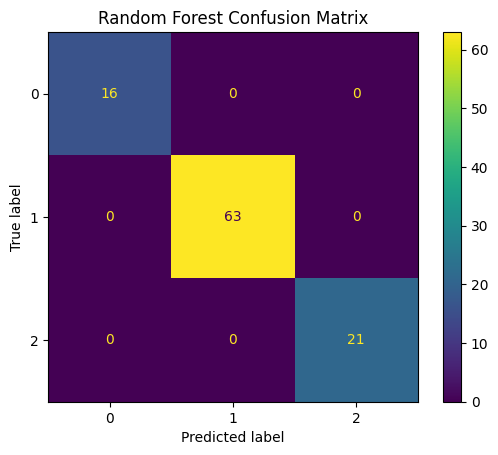

In [274]:
# === 1. Confusion Matrix: Random Forest ===
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(y_test, rf_preds)
plt.title("Random Forest Confusion Matrix")
plt.grid(False)
plt.show()


<Figure size 600x400 with 0 Axes>

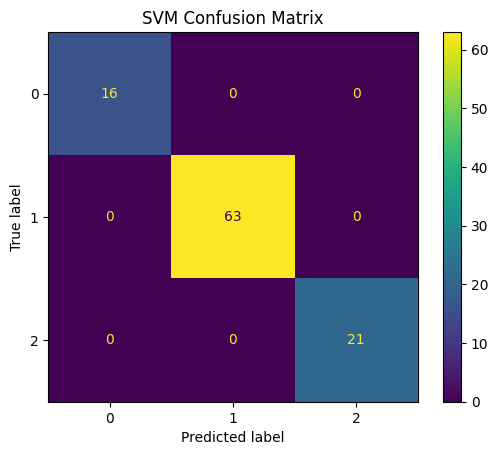

In [275]:
# === 2. Confusion Matrix: SVM ===
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(y_test, svm_best_preds)
plt.title("SVM Confusion Matrix")
plt.grid(False)
plt.show()


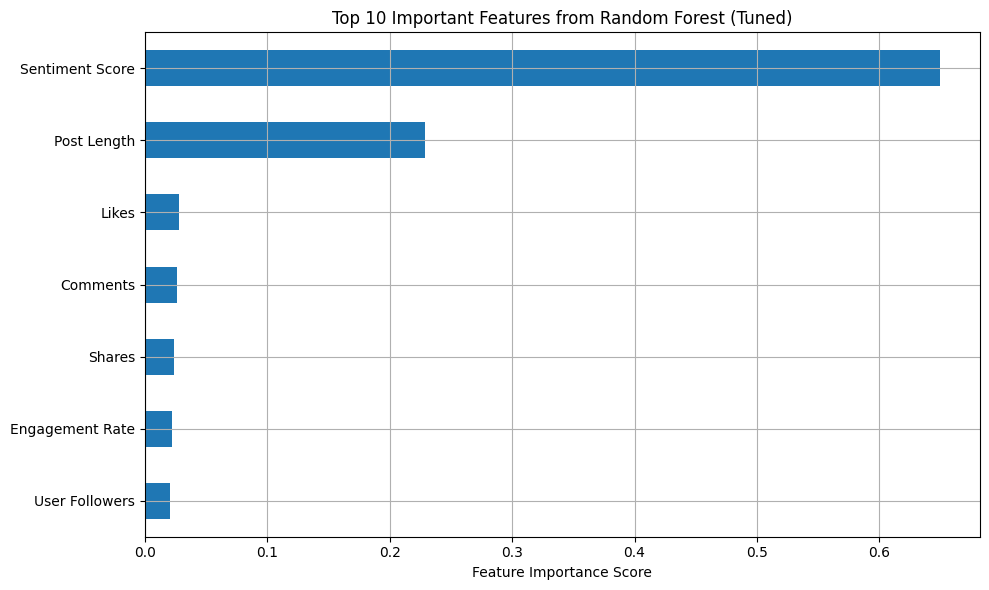

In [276]:
# Assuming the tuned model is rf_best
importances = rf_best.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:10]

# Plotting
plt.figure(figsize=(10, 6))
feat_imp.plot(kind='barh')
plt.title('Top 10 Important Features from Random Forest (Tuned)')
plt.xlabel('Feature Importance Score')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


In [277]:
from sklearn.metrics import classification_report

# Print detailed metrics for both models
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

print("SVM Classification Report:")
print(classification_report(y_test, svm_best_preds))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        21

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        21

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [278]:
# Generate classification report as a DataFrame for Random Forest
rf_report_df = pd.DataFrame(classification_report(y_test, rf_preds, output_dict=True)).T
print(rf_report_df)


              precision  recall  f1-score  support
0                   1.0     1.0       1.0     16.0
1                   1.0     1.0       1.0     63.0
2                   1.0     1.0       1.0     21.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    100.0
weighted avg        1.0     1.0       1.0    100.0


In [279]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
kmeans_silhouette = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score: {kmeans_silhouette:.4f}")


Silhouette Score: 0.1482


Silhouette Score for KMeans Clustering: 0.15


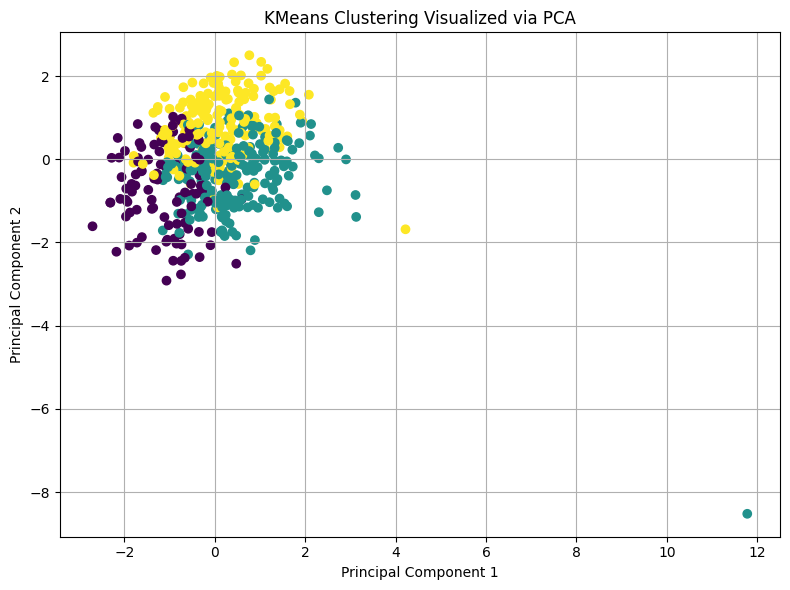

In [280]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Scale your features first
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Silhouette score
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score for KMeans Clustering: {sil_score:.2f}")

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("KMeans Clustering Visualized via PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


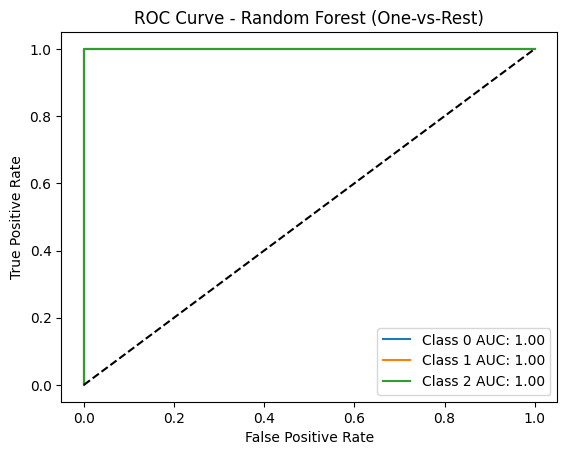

In [281]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

y_bin = label_binarize(y_test, classes=[0, 1, 2])
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])

rf_ovr = OneVsRestClassifier(rf_best).fit(X_train, y_train_bin)
y_score = rf_ovr.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} AUC: {roc_auc[i]:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Random Forest (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [282]:
import pandas as pd

# Create the comparison summary table
comparison_df = pd.DataFrame({
    "Model": ["Random Forest", "SVM", "KMeans", "Association Rules"],
    "Type": ["Supervised", "Supervised", "Unsupervised", "Rule Mining"],
    "Performance Insight": [
        "Perfect classification; well-separated metadata",
        "High accuracy, slightly less than RF",
        "Weak clusters; low silhouette score",
        "Revealed patterns like Brand + Link → LinkedIn"
    ]
})

# Display the table
print("Model Comparison Summary:")
display(comparison_df)


Model Comparison Summary:


,Model,Type,Performance Insight
0,Random Forest,Supervised,Perfect classification; well-separated metadata
1,SVM,Supervised,"High accuracy, slightly less than RF"
2,KMeans,Unsupervised,Weak clusters; low silhouette score
3,Association Rules,Rule Mining,Revealed patterns like Brand + Link → LinkedIn
